# FIT5196 Assessment 3
## Exploratory Data Analysis and Data Cleansing

#### Student Name: Akshatha Shivashankar Chindalur
#### Student ID: 29996503
#### Student Name: Pradnya Alchetti
#### Student ID: 29595916

Date: 07/10/2019

Version: 1.0

Environment: Python 3.7.3 and Jupyter notebook

Libraries used: 

* pandas (for accessing and modifying data in csv files, included in Anaconda Python 3.7) 
* networkx (for computing the shortest distance (Dijkstra's algorithm), included in Anaconda Python 3.7) 
* numpy (for solving simultaneous equations, included in Anaconda Python 3.7) 

### Importing the libraries necessary for data exploration and cleaning.

In [1]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime
import ast

### Reading the given dirty CSV files and files which have location information about the customers

In [2]:
# CSV files to be explored and cleaned

dirty_df = pd.read_csv("./Group113_dirty_data.csv")
outlier_df = pd.read_csv("./Group113_outlier_data.csv")
missing_df = pd.read_csv("./Group113_missing_data.csv")

In [3]:
# Files containaing location information

node = pd.read_csv("./nodes.csv")
edges = pd.read_csv("./edges.csv")
branches = pd.read_csv("./branches.csv")

## Task 1: Imputing Missing Values

In [4]:
# The given data is explored to identify the missing values and understand how it can be imputed.

missing_df.shape

(500, 12)

the dataset has information about 500 customers and their 12 associated features (columns).

In [5]:
missing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                400 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    450 non-null float64
delivery_fee               450 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


The **info()** function gives a brief description regarding the data types of each feature and the number of non-null values in them. From the above information, we can observe that there are **500** rows in total. There are missing values in **3** columns namely **branch_code** with **100** rows missing, **distance_to_customer_KM** with **50** rows missing and **delivery_fee** with **50** rows missing.

Now, we explore the data further,

In [6]:
missing_df.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDB00336,2018-11-27,18:59:09,Dinner,TP,"[('Fish&Chips', 9), ('Shrimp', 2), ('Pasta', 5)]",560.50,-37.816186,145.012942,0,12.129,16.144210
1,ORDJ03182,2018-03-30,10:52:23,Breakfast,NaN,"[('Coffee', 6), ('Cereal', 1)]",66.00,-37.810246,144.961350,0,8.501,11.384186
2,ORDC01032,2018-09-18,16:37:10,Dinner,NS,"[('Salmon', 6), ('Shrimp', 4), ('Pasta', 6), (...",837.00,-37.806882,144.957889,0,8.110,13.893630
3,ORDX03103,2018-11-21,18:38:52,Dinner,BK,"[('Shrimp', 8), ('Salmon', 9), ('Fish&Chips', ...",1188.50,-37.813348,144.935750,0,10.285,17.171047
4,ORDJ00175,2018-08-08,15:16:03,Lunch,NaN,"[('Burger', 7), ('Steak', 4)]",397.00,-37.806441,144.941329,0,NaN,13.082562
5,ORDC10707,2018-06-21,13:34:38,Lunch,NS,"[('Burger', 6), ('Steak', 10), ('Fries', 4), (...",934.80,-37.816436,144.945835,0,9.289,14.497747
6,ORDC03606,2018-11-27,18:59:09,Dinner,NS,"[('Shrimp', 5), ('Salmon', 2), ('Pasta', 6), (...",867.00,-37.822599,145.002643,0,10.659,16.479383
7,ORDX09077,2018-03-27,10:42:15,Breakfast,BK,"[('Coffee', 7), ('Eggs', 6), ('Pancake', 9)]",402.75,-37.812331,144.953925,0,8.323,13.183230
8,ORDK00723,2018-11-19,18:38:52,Dinner,NaN,"[('Shrimp', 8), ('Fish&Chips', 8), ('Pasta', 4)]",822.00,-37.818975,145.008136,0,NaN,11.056059
9,ORDC09181,2018-08-03,15:05:54,Lunch,NaN,"[('Steak', 9), ('Salad', 1), ('Chicken', 1)]",454.20,-37.812372,144.947939,0,10.668,16.213722


In [7]:
# the date is converted to datetime insead of it being a string
missing_df['date'] = pd.to_datetime(missing_df['date'])

The customers of the branch with code **BK** are filtered out:

In [8]:
missing_df[missing_df['branch_code'] == 'BK'].head(15)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
3,ORDX03103,2018-11-21,18:38:52,Dinner,BK,"[('Shrimp', 8), ('Salmon', 9), ('Fish&Chips', ...",1188.50,-37.813348,144.935750,0,10.285,17.171047
7,ORDX09077,2018-03-27,10:42:15,Breakfast,BK,"[('Coffee', 7), ('Eggs', 6), ('Pancake', 9)]",402.75,-37.812331,144.953925,0,8.323,13.183230
11,ORDK09315,2018-08-01,14:55:46,Lunch,BK,"[('Steak', 5), ('Chicken', 2), ('Salad', 8), (...",541.60,-37.798577,144.980735,0,6.869,12.450928
16,ORDA01298,2018-08-23,15:46:28,Lunch,BK,"[('Burger', 8), ('Fries', 2), ('Chicken', 8), ...",1042.80,-37.820163,144.968664,0,7.694,NaN
17,ORDX10455,2018-03-26,10:42:15,Breakfast,BK,"[('Coffee', 3), ('Cereal', 9)]",211.50,-37.816769,144.951890,0,10.180,14.765277
21,ORDX01829,2018-10-11,17:17:44,Dinner,BK,"[('Shrimp', 4), ('Salmon', 9), ('Fish&Chips', ...",952.50,-37.812095,144.953415,0,8.426,NaN
23,ORDA10166,2018-08-20,15:36:20,Lunch,BK,"[('Burger', 5), ('Salad', 10), ('Chicken', 2),...",481.00,-37.804659,144.953431,0,8.435,14.598538
24,ORDA08755,2018-06-14,13:24:30,Lunch,BK,"[('Salad', 5), ('Burger', 4), ('Steak', 1), ('...",339.00,-37.809578,144.963772,0,7.388,13.597528
28,ORDK05238,2018-02-07,09:10:59,Breakfast,BK,"[('Eggs', 1), ('Pancake', 8), ('Cereal', 8)]",384.00,-37.813585,144.960729,0,7.906,12.685734
30,ORDK05229,2018-05-05,12:03:22,Lunch,BK,"[('Salad', 3), ('Chicken', 1)]",83.60,-37.816239,144.963762,0,7.791,15.878269


On observing this data closely, it is noticed that their **order IDs** have a pattern. Each ID associated with 
**BK** branch begin with either **ORDA**, **ORDK** or **ORDX**.

Similar observations were made with respect to other branches as well:

The customers of the branch with code **TP** are filtered out:

In [9]:
missing_df[missing_df['branch_code'] == 'TP'].head(15)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDB00336,2018-11-27,18:59:09,Dinner,TP,"[('Fish&Chips', 9), ('Shrimp', 2), ('Pasta', 5)]",560.50,-37.816186,145.012942,0,12.129,16.144210
10,ORDB01865,2018-11-04,18:08:27,Dinner,TP,"[('Pasta', 2), ('Shrimp', 1)]",109.00,-37.818751,144.953040,0,8.552,14.329238
12,ORDY03961,2018-11-16,18:38:52,Dinner,TP,"[('Shrimp', 10), ('Salmon', 3)]",663.00,-37.799811,144.958342,0,9.784,14.016848
15,ORDY06940,2018-04-23,11:43:05,Breakfast,TP,"[('Coffee', 2), ('Eggs', 4), ('Pancake', 10)]",345.50,-37.818680,144.953187,0,8.536,NaN
29,ORDB00245,2018-07-12,14:15:12,Lunch,TP,"[('Chicken', 5), ('Burger', 4)]",284.00,-37.816873,145.007266,0,11.442,NaN
32,ORDB03699,2018-10-10,17:17:44,Dinner,TP,"[('Fish&Chips', 5), ('Salmon', 10), ('Pasta', ...",990.50,-37.819765,144.998960,0,10.572,14.407244
33,ORDY04052,2018-05-24,12:43:56,Lunch,TP,"[('Burger', 3), ('Fries', 8), ('Salad', 5)]",275.00,-37.812841,144.939897,0,10.153,13.020443
34,ORDJ01836,2018-11-23,18:49:00,Dinner,TP,"[('Pasta', 9), ('Shrimp', 10), ('Fish&Chips', 6)]",997.50,-37.805582,144.945080,0,10.058,NaN
37,ORDJ00763,2018-01-28,08:50:42,Breakfast,TP,"[('Eggs', 8), ('Coffee', 10), ('Cereal', 7), (...",519.25,-37.816969,144.961547,0,7.985,12.486570
46,ORDJ02422,2018-04-26,11:43:05,Breakfast,TP,"[('Coffee', 7), ('Cereal', 9), ('Eggs', 3)]",307.50,-37.818363,144.967075,0,7.680,10.832874


On observing this data closely, it is noticed that their **order IDs** have a pattern. Each ID associated with 
**TP** branch begin with either **ORDB**, **ORDJ** or **ORDY**.

Lastly, customers of the branch with code **NS** are filtered out:

In [10]:
missing_df[missing_df['branch_code'] == 'NS'].head(15)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
2,ORDC01032,2018-09-18,16:37:10,Dinner,NS,"[('Salmon', 6), ('Shrimp', 4), ('Pasta', 6), (...",837.00,-37.806882,144.957889,0,8.110,13.893630
5,ORDC10707,2018-06-21,13:34:38,Lunch,NS,"[('Burger', 6), ('Steak', 10), ('Fries', 4), (...",934.80,-37.816436,144.945835,0,9.289,14.497747
6,ORDC03606,2018-11-27,18:59:09,Dinner,NS,"[('Shrimp', 5), ('Salmon', 2), ('Pasta', 6), (...",867.00,-37.822599,145.002643,0,10.659,16.479383
18,ORDZ09567,2018-03-23,10:42:15,Breakfast,NS,"[('Coffee', 1), ('Pancake', 2), ('Eggs', 8), (...",421.00,-37.814937,144.945292,0,9.156,14.253410
19,ORDC07267,2018-03-08,10:11:49,Breakfast,NS,"[('Eggs', 2), ('Cereal', 5), ('Coffee', 7)]",201.50,-37.816233,144.964496,0,8.296,13.243632
20,ORDI01942,2018-03-06,10:01:41,Breakfast,NS,"[('Cereal', 3), ('Pancake', 5), ('Coffee', 3)]",206.75,-37.816075,144.983844,0,8.661,13.361177
35,ORDI00053,2018-07-07,14:05:04,Lunch,NS,"[('Chicken', 4), ('Salad', 9), ('Burger', 6), ...",558.80,-37.801751,144.995098,0,8.532,16.366003
36,ORDZ05901,2018-02-17,09:31:16,Breakfast,NS,"[('Pancake', 8), ('Coffee', 3), ('Eggs', 4), (...",430.50,-37.804137,144.949785,0,8.409,15.185905
39,ORDC03882,2018-05-28,12:54:05,Lunch,NS,"[('Chicken', 9), ('Burger', 7), ('Fries', 2)]",529.00,-37.809610,144.955281,0,8.145,13.527027
45,ORDZ00562,2018-07-11,14:15:12,Lunch,NS,"[('Chicken', 8), ('Fries', 4), ('Burger', 4), ...",496.80,-37.816073,145.000797,0,10.012,15.763711


On observing this data closely, it is noticed that their **order IDs** have a pattern. Each ID associated with 
**NS** branch begin with either **ORDC**, **ORDI** or **ORDZ**.

Using this above derived observations, the branch code for **100** missing observations is imputed.

In [11]:
#   This function determines the branch codes for those observations with missing branch codes. This
#   is done with respect to their order IDs.
#
#   :param order_id:    the order ID of the given observation.
#          branch_code: the branch code of the corresponding observation (can be null).
#
#   :return branch_code:   the branch code determined for that observation.

def check_branch_code(order_id, branch_code):
    
    # check if branch code is a null value
    if pd.isnull(branch_code):
        # the branch code is assigned as BK if its corresponding order ID starts with 'ORDA', 'ORDK'
        # or 'ORDX'.
        if order_id.startswith('ORDA') or order_id.startswith('ORDK') or order_id.startswith('ORDX'):
            return 'BK'
        # the branch code is assigned as TP if its corresponding order ID starts with 'ORDB', 'ORDJ'
        # or 'ORDY'.
        elif order_id.startswith('ORDB') or order_id.startswith('ORDJ') or order_id.startswith('ORDY'):
            return 'TP'
        # the branch code is assigned as NS if its corresponding order ID starts with 'ORDC', 'ORDI'
        # or 'ORDZ'.
        elif order_id.startswith('ORDC') or order_id.startswith('ORDI') or order_id.startswith('ORDZ'):
            return 'NS'
        
    return branch_code

# imputing 100 missing branch code in the given dataset
missing_df['branch_code'] = missing_df.apply(lambda row:check_branch_code(row['order_id'], row['branch_code']),axis=1)

Next, we impute the **distance_to_customer_KM** column. 

As seen initially, there are **50** null values in this column. The imputation is done by computing the 
minimum distance of the customer from its branch (denoted in Branch code) using the Dijkstra's algorithm.

In [12]:
# the branch name column from branches dataset is dropped/removed.

branches.drop(['branch_name'], axis=1, inplace=True)
branches

,branch_code,branch_lat,branch_lon
0,NS,-37.773803,144.983647
1,TP,-37.861835,144.905716
2,BK,-37.815834,145.046450


In [13]:
# the above data is merged with branches dataset to retrieve latitude and longitude of the respective branches
# of the customers.

missing_df_with_branch = pd.merge(missing_df, branches, on='branch_code')
missing_df_with_branch.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,branch_lat,branch_lon
0,ORDB00336,2018-11-27,18:59:09,Dinner,TP,"[('Fish&Chips', 9), ('Shrimp', 2), ('Pasta', 5)]",560.5,-37.816186,145.012942,0,12.129,16.144210,-37.861835,144.905716
1,ORDJ03182,2018-03-30,10:52:23,Breakfast,TP,"[('Coffee', 6), ('Cereal', 1)]",66.0,-37.810246,144.961350,0,8.501,11.384186,-37.861835,144.905716
2,ORDJ00175,2018-08-08,15:16:03,Lunch,TP,"[('Burger', 7), ('Steak', 4)]",397.0,-37.806441,144.941329,0,NaN,13.082562,-37.861835,144.905716
3,ORDB01865,2018-11-04,18:08:27,Dinner,TP,"[('Pasta', 2), ('Shrimp', 1)]",109.0,-37.818751,144.953040,0,8.552,14.329238,-37.861835,144.905716
4,ORDY03961,2018-11-16,18:38:52,Dinner,TP,"[('Shrimp', 10), ('Salmon', 3)]",663.0,-37.799811,144.958342,0,9.784,14.016848,-37.861835,144.905716
5,ORDY06940,2018-04-23,11:43:05,Breakfast,TP,"[('Coffee', 2), ('Eggs', 4), ('Pancake', 10)]",345.5,-37.818680,144.953187,0,8.536,NaN,-37.861835,144.905716
6,ORDB00245,2018-07-12,14:15:12,Lunch,TP,"[('Chicken', 5), ('Burger', 4)]",284.0,-37.816873,145.007266,0,11.442,NaN,-37.861835,144.905716
7,ORDB03699,2018-10-10,17:17:44,Dinner,TP,"[('Fish&Chips', 5), ('Salmon', 10), ('Pasta', ...",990.5,-37.819765,144.998960,0,10.572,14.407244,-37.861835,144.905716
8,ORDY04052,2018-05-24,12:43:56,Lunch,TP,"[('Burger', 3), ('Fries', 8), ('Salad', 5)]",275.0,-37.812841,144.939897,0,10.153,13.020443,-37.861835,144.905716
9,ORDJ01836,2018-11-23,18:49:00,Dinner,TP,"[('Pasta', 9), ('Shrimp', 10), ('Fish&Chips', 6)]",997.5,-37.805582,144.945080,0,10.058,NaN,-37.861835,144.905716


In [14]:
# creating a network from the edges dataframe for computing the shortest distance path
network_G = nx.from_pandas_edgelist(edges, 'u', 'v', ['distance(m)'])

In [15]:
#   This function computes the shortest distance between the given customer and its respective branch.
#   The distance is computed with the help of Dijkstra's algorithm.
#
#   :param branch_lat:    the latitude of the branch.
#          branch_lon:    the longitude of the branch.
#          cust_lat:      the latitude of the customer.
#          cust_lon:      the longitude of the customer.
#
#   :return shortest_dist:   the computed shortest distance between the customer and its branch.

def calculate_distance(branch_lat, branch_lon, cust_lat, cust_lon):
    
    # the branch and the customer nodes are defined.
    branch_node = int(node[(node['lat']==branch_lat) & (node['lon']==branch_lon)] ['node'])
    cust_node = int(node[(node['lat']==cust_lat) & (node['lon']==cust_lon)] ['node'])
   
    # the shortest distance is computed using the Dijkstra's algorithm 
    distance, path= nx.single_source_dijkstra(network_G, source = branch_node, target = cust_node, weight = 'distance(m)')
    # converting meters to kilometers
    shortest_dist = distance/1000
    
    return shortest_dist

In [16]:
# only the rows which have null distance values are imputed with the shortest distance.

missing_df_with_branch.loc[missing_df_with_branch['distance_to_customer_KM'].isnull(),\
    'distance_to_customer_KM'] = missing_df_with_branch[missing_df_with_branch['distance_to_customer_KM'].isnull()].\
                                 apply(lambda row:calculate_distance(row['branch_lat'], row['branch_lon'], \
                                 row['customer_lat'], row['customer_lon']),axis=1)

In [17]:
# once the distances are imputed, the merged information about the branches are dropped.

missing_df_with_branch.drop(['branch_lat', 'branch_lon'], axis=1, inplace=True)

In [18]:
missing_df_with_branch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null datetime64[ns]
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               450 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 50.8+ KB


Now that the **distances** and **branch codes** have been imputed, there are only **50** missing values within the **delivery_fee** column. Since the shortest distance and branch code were easily derivable from other features that is these were the cases of **Missing at Random** data. Therefore, they were considered to be imputed first. 

Since delivery fee is a case of **Missing not at Random**, it is linearly dependent on the unobserved predictors. Therefore, regression models are built to impute the missing values. Further, the delivery fee is dependent on:

1. if the day is a weekend or a weekday
2. time of the day
3. distance between branch and the customer

Thus, in order to build the models, additional columns **weekend**: if the day is a weekend; **time_of_day**: morning, afternoon or evening are added to the given data. Another column **normalised_fee** which normalises the delivery fee is created. This column, stores the actual delivery fee and not the discounted fees for customers who have a loyalty.

In [19]:
# a new data frame with additional columns weekend, time_of_day and normalised_fee are added.

delivery_fee = missing_df_with_branch.join(pd.DataFrame(
    {
        'weekend': np.nan,
        'time_of_day': np.nan,
        'normalised_fee': np.nan
    }, index=missing_df_with_branch.index
))

In [20]:
#   This function checks if the given day is a weekend or a weekday
#
#   :param date:    the date of the day when the order was made.
#
#   :return (0 or 1):   a boolean value 1 - if it is a weekend
#                                       0 - if it is a weekday

def is_weekend(order_date):
    
 #   if isinstance(date, str)
  #      y, m, d = (int(x) for x in date.split('-')) 
        
    if (order_date.weekday()) < 5:
        return 0
    else:
        return 1    

In [21]:
# the 'weekend' column is filled with boolean depending on the date of the order

delivery_fee['weekend'] = delivery_fee.apply(lambda row:is_weekend(row['date']),axis=1)

The **time_of_day** is determined with respect to the **order_type** - breakfast (morning), lunch (afternoon) or dinner (evening). In order to do this, first the **order_type** is made to a categorical variable and then its respective code is added to the **time_of_day** column.

In [22]:
# converting 'order_type' to categorical variable
delivery_fee['order_type'] = delivery_fee['order_type'].astype('category')

# corresponding code of 'order_type' is added to the 'time_of_day' column
delivery_fee['time_of_day'] = pd.Categorical(delivery_fee['order_type'], categories=["Breakfast", "Lunch", "Dinner"],
                                          ordered=True).codes

In [23]:
delivery_fee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 15 columns):
order_id                   500 non-null object
date                       500 non-null datetime64[ns]
time                       500 non-null object
order_type                 500 non-null category
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               450 non-null float64
weekend                    500 non-null int64
time_of_day                500 non-null int8
normalised_fee             0 non-null float64
dtypes: category(1), datetime64[ns](1), float64(6), int64(2), int8(1), object(4)
memory usage: 75.8+ KB


As it can be seen above, 3 additional columns have been added to the previous dataset. This dataset can now be used to generate the linear models.

Since, we now have **450** observations with no errors or missing values, these are used to train the linear
model.

In [24]:
# delivery fee data split into 'train_data': no missing values or errors and 
# 'missing_delivery_fee': the delivery fee values are null (to be imputed).

train_data = delivery_fee[delivery_fee['delivery_fee'].notnull()]
missing_delivery_fee = delivery_fee[delivery_fee['delivery_fee'].isnull()]

Since, customers who have loyalty get a 50% discount on their delivery fee, the normalised fee would be the twice that of the **delivery_fee** for customers with loyalty (1).

In [25]:
#   This function normalises the delivery fee by removing the discounts added to cutomers
#   with loyalty. 
#
#   :param loyalty:  if the customer has a loyalty or not.
#          fee:      the delivery fee of the customer
#
#   :return fee:   the normalised delivery fee of the customer

def normalise_delivery_fee(loyalty, fee):

    if loyalty:
        fee = 2 * fee
        return fee
    return fee  

In [26]:
# computing the un-discounted delivery fee for all the customers
train_data.loc[:,'normalised_fee'] = train_data.apply(lambda row:normalise_delivery_fee(row['customerHasloyalty?'], 
                                                                      row['delivery_fee']),axis=1) 

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


It is given that the delivery fee is computed differently for each branch. Thus, **3** different linear models
are built for each branch of the restaurant.

In [27]:
# training data split with respect to the branch code
train_data_bk = train_data[train_data['branch_code'] == 'BK']
train_data_ns = train_data[train_data['branch_code'] == 'NS']
train_data_tp = train_data[train_data['branch_code'] == 'TP']

The predictor variables are:

1. weekend
2. time_of_day
3. distance_to_customer_KM

The response variable is:

**normalised_fee**

Thus the 3 models will be - **multiple linear regression**

*It should also be noted that the variables **weekend** and **time_of_day** are treated as continous
variables and not as categorical*

#### Model 1: Branch BK

In [28]:
# extracting the response and predictor variables for branch BK
X_bk = train_data_bk[['weekend', 'time_of_day', 'distance_to_customer_KM']]
Y_bk = train_data_bk[['normalised_fee']]

# intialising and building the model
reg_bk = LinearRegression().fit(X_bk, Y_bk)

print('R^2: ', reg_bk.score(X_bk, Y_bk))

R^2:  0.9828577349756705


Text(0, 0.5, 'Actual Values')

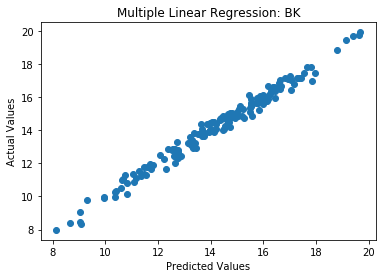

In [29]:
bk_pred = reg_bk.predict(X_bk)

plt.title('Multiple Linear Regression: BK')
plt.scatter(bk_pred, Y_bk)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

#### Model 2: Branch NS

In [30]:
# extracting the response and predictor variables for branch NS
X_ns = train_data_ns[['weekend','time_of_day', 'distance_to_customer_KM']]
Y_ns = train_data_ns[['normalised_fee']]

# intialising and building the model
reg_ns = LinearRegression().fit(X_ns, Y_ns)

print('R^2: ', reg_ns.score(X_ns, Y_ns))

R^2:  0.9669569833209158


Text(0, 0.5, 'Actual Values')

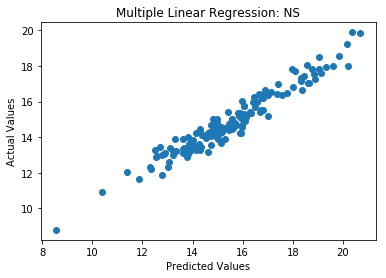

In [31]:
ns_pred = reg_bk.predict(X_ns)

plt.title('Multiple Linear Regression: NS')
plt.scatter(ns_pred, Y_ns)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

#### Model 3: Branch TP

In [32]:
# extracting the response and predictor variables for branch TP
X_tp = train_data_tp[['weekend', 'time_of_day', 'distance_to_customer_KM']]
Y_tp = train_data_tp[['normalised_fee']]

# intialising and building the model
reg_tp = LinearRegression().fit(X_tp, Y_tp)

print('R^2: ', reg_tp.score(X_tp, Y_tp))

R^2:  0.9574459614575873


Text(0, 0.5, 'Actual Values')

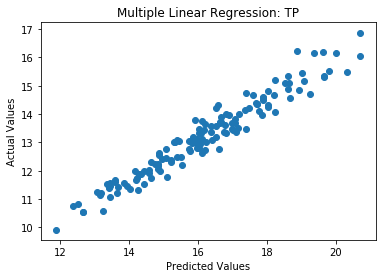

In [33]:
tp_pred = reg_bk.predict(X_tp)

plt.title('Multiple Linear Regression: TP')
plt.scatter(tp_pred, Y_tp)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

As it can be seen the obtained R^2 values and the plots for all the **3** models show that the data is highly linearly dependent on the three predictor variables. Thus, these models can be used for imputing the missing delivery fee values. 

In [34]:
#   This function computes the missing delivery fee for customers based on the 
#   above 3 linear models.
#
#   :param branch:      the branch code of the customer
#          weekend:     feature which identifies if the day is a weekend or a weekday
#          time_of_day: feature which determines if the time of day is morning, afternoon or evening.
#          distance:    the shortest distance between the customer and the branch
# 
#   :return fee:   the predicted delivery fee for the customer as per the linear model.

def calculate_fee(branch, weekend, time_of_day, distance):
    
    if branch == 'BK':
        fee = reg_bk.predict([[weekend, time_of_day, distance]])
    elif branch == 'NS':
        fee = reg_ns.predict([[weekend, time_of_day, distance]])
    else:
        fee = reg_tp.predict([[weekend, time_of_day, distance]])
        
    return fee[0][0]

In [35]:
# delivery fee imputation 
missing_delivery_fee.loc[:,'normalised_fee'] = missing_delivery_fee.apply(lambda row:calculate_fee(row['branch_code'],
                                        row['weekend'], row['time_of_day'], row['distance_to_customer_KM']),axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


A similar logic is used to provide discount to loyal customers. That is a their predicted delivery fee is reduced to half.

In [36]:
#   This function does the reverse of normalisation of delivery fee. That is if the customer
#   has loyalty then the 'deliver_fee' is calculated be adding a discount to the predicted fee.
#
#   :param loyalty:   if the customer has a loyalty or not
#          fee:       the predicted delivery fee of the customer
# 
#   :return fee:   the discounted(if any) delivery fee for the customers with loyalty

def check_loyalty(loyalty, fee):
    
    if loyalty:
        fee = 0.5 * fee
        return fee
    return fee

In [37]:
# computing the discounted delivery fee for customers who have a loyalty

missing_delivery_fee.loc[:,'delivery_fee'] = missing_delivery_fee.apply(lambda row:check_loyalty(
                                                                         row['customerHasloyalty?'], 
                                                                         row['normalised_fee']),axis=1)

Now, that we have imputed all the missing values, we combine the data and generate a CSV file with thw imputed values
as below:

In [38]:
# the 50 imputed observations is combined with the remaining data
missing_data_sol = pd.concat([train_data , missing_delivery_fee])

# additional columns that were added to generate the model are discarded
missing_data_sol = missing_data_sol.drop(columns=['weekend', 'time_of_day', 'normalised_fee'])

# the cleaned data is stored into a CSV file
missing_data_sol.to_csv('./Group113_missing_data_solution.csv', index=False, header=True)

## Task 2: Fixing Errors

Inital exploration of the data is done to understand the variables and their properties

In [39]:
dirty_df.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,490.960700,-30.754358,143.504515,0.126000,8.822786,13.722854
std,258.944904,25.336872,16.299119,0.332182,1.648781,2.564382
min,43.000000,-37.840654,-37.823134,0.000000,3.562000,3.955939
25%,296.812500,-37.818644,144.950373,0.000000,7.882250,12.502573
50%,460.100000,-37.812013,144.963606,0.000000,8.872500,13.781359
75%,645.000000,-37.804556,144.982663,0.000000,9.954000,15.350428
max,1397.000000,145.015210,145.018834,1.000000,13.848000,20.370184


From the above summary of the dataset, the follwoing observations are identified:
* The customer latitude has the max value of 145 which can be considered as a potential error
* The customer longitude has minimum value -37 which can also be considered as a potential error as the restaurant is present in Melbourne whose co-ordinates are -37.814, 144.96332

In [40]:
dirty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               500 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


As it can be seen, there are no missing values in the dataset. Although there could be syntatic, semantic or coverage 
errors which are identified and fixed below.

In [41]:
# first few observations are looked at

dirty_df.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDY03163,2018-09-15,16:27:02,Dinner,tp,"[('Fish&Chips', 4), ('Salmon', 7), ('Pasta', 3...",671.5,-37.815611,144.973490,0,8.318,14.140324
1,ORDB08039,2018-05-19,12:33:48,Lunch,TP,"[('Steak', 4), ('Salad', 7)]",300.4,-37.806544,145.010707,0,12.438,17.011135
2,ORDA01841,2018-08-21,15:36:20,Lunch,BK,"[('Fish&Chips', 3), ('Fries', 10), ('Chicken',...",511.0,-37.823347,144.988505,0,6.383,12.206218
3,ORDB05089,2018-03-14,10:21:58,Breakfast,TP,"[('Coffee', 3), ('Cereal', 10), ('Pancake', 10)]",475.0,-37.799659,144.970194,0,9.221,12.911713
4,ORDA10328,2018-07-16,14:25:21,Dinner,BK,"[('Fries', 9), ('Salad', 8), ('Burger', 6)]",431.6,-37.805799,144.994800,0,5.102,11.231360
5,ORDA04006,2018-07-04,14:05:04,Lunch,BK,"[('Steak', 7), ('Fries', 4), ('Chicken', 5)]",523.0,-37.823397,144.935580,0,10.609,16.674012
6,ORDI08864,2018-02-08,09:10:59,Breakfast,NS,"[('Pancake', 6), ('Eggs', 9), ('Cereal', 9)]",532.5,-37.816826,144.950559,0,9.724,14.106872
7,ORDA06294,2018-09-13,16:27:02,Dinner,BK,"[('Pasta', 1), ('Shrimp', 9), ('Salmon', 9)]",882.5,-37.809284,144.957531,0,8.000,15.366063
8,ORDJ02649,2018-04-02,10:52:23,Breakfast,TP,"[('Shrimp', 6), ('Cereal', 9)]",334.5,-37.824250,144.990517,0,9.618,11.508372
9,ORDB10854,2018-11-09,18:18:35,Dinner,TP,"[('Pasta', 2), ('Shrimp', 5), ('Fish&Chips', 2)]",395.0,-37.811794,144.946072,1,9.842,13.802297


In [42]:
dirty_df.describe(include=['O'])

,order_id,date,time,order_type,branch_code,order_items
count,500,500,500,500,500,500
unique,500,298,72,3,6,498
top,ORDY08030,2018-11-11,13:24:30,Dinner,TP,"[('Fish&Chips', 7), ('Pasta', 3)]"
freq,1,6,13,170,174,2


We start checking for errors from the leftmost column.

#### First Column: order_id

From the above description of categorical columns, it is evident that **order_id** has 500 unique columns. Thus we assume that there are no errors in the data with respect to this column.

#### Second Column: date

In this column, there could be **syntactical and semantic errors**. Thus, we check for format of the date which is:
**YYYY-MM-DD** and also if the month (MM) and days(DD) are within 12 and 31(or 28 or 30) respectively.

In [43]:
# the format of the dates are verified

date_mask = pd.to_datetime(dirty_df.date, format='%Y-%m-%d', errors='coerce').isna()
dirty_date = dirty_df.loc[date_mask, :]
dirty_date.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
30,ORDC04608,2018-24-09,16:47:19,Dinner,NS,"[('Shrimp', 10), ('Pasta', 2), ('Fish&Chips', 3)]",700.00,-37.816886,144.988144,0,9.050,15.276973
40,ORDX10324,10-01-2018,08:10:08,Breakfast,BK,"[('Eggs', 3), ('Pancake', 5), ('Cereal', 9)]",376.25,-37.806651,144.957028,1,8.296,6.822306
50,ORDJ06852,2018-23-05,12:43:56,Lunch,TP,"[('Fries', 5), ('Steak', 10), ('Burger', 4)]",634.00,-37.814628,144.983456,0,9.310,13.094294
55,ORDB05508,2018-16-10,17:27:53,Dinner,TP,"[('Pasta', 8), ('Shrimp', 5), ('Fish&Chips', 8...",1180.00,-37.822314,144.996798,0,10.154,14.085795
61,ORDB09528,2018-19-01,08:30:25,Breakfast,TP,"[('Eggs', 4), ('Coffee', 9), ('Pancake', 3)]",228.25,-37.805573,144.953490,0,9.413,11.779022
80,ORDX10265,04-11-2018,18:08:27,Dinner,BK,"[('Pasta', 6), ('Shrimp', 8), ('Fish&Chips', 7...",965.00,-37.811351,144.952810,0,8.456,17.851977
153,ORDI09232,2018-15-08,15:26:11,Lunch,NS,"[('Fries', 4), ('Steak', 2), ('Chicken', 10), ...",692.20,-37.808185,144.975624,0,7.292,12.705843
164,ORDX01295,11-11-2018,18:28:43,Dinner,BK,"[('Salmon', 8), ('Shrimp', 8), ('Pasta', 5), (...",967.50,-37.817193,144.958842,0,8.285,17.801597
166,ORDC00567,2018-17-07,14:25:21,Lunch,NS,"[('Salad', 10), ('Chicken', 6), ('Burger', 9)]",643.00,-37.808679,144.948694,0,8.809,15.180942
167,ORDI08693,2018-20-12,19:39:43,Dinner,NS,"[('Fish&Chips', 10), ('Shrimp', 5)]",620.00,-37.815358,144.936667,0,10.042,15.928873


It can be seen above that there are several observations which have incorrect date format. A fix is applied for these below.

In [44]:
#   This function provides a fix for the date format and also verifies if the month and days 
#   are semantically correct.
#
#   :param date_str:   the string which contains the date of the order placed by a customer
# 
#   :return formatted_date:   the formatted date accordint to YYYY-MM-DD.

def fix_date(date_str):
    
    date_token = date_str.split('-')
    year = (date_token[0])
    month = (int)(date_token[1])
    date = (int)(date_token[2])
    
    if len(year) != 4:
        year, date = date,(int)(year)
    
    if month > 12:
        date, month = month,date

    if month in (4,6,9,11):
        if date > 30:
            date = 30
            
    if month == 2:
        if date > 28:
            date =28
    
    formatted_date = pd.to_datetime(str(year)+"-"+str(month)+"-"+str(date),format='%Y-%m-%d')

    return formatted_date

In [45]:
dirty_df['date'] = dirty_df['date'].apply(fix_date)
dirty_df.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDY03163,2018-09-15,16:27:02,Dinner,tp,"[('Fish&Chips', 4), ('Salmon', 7), ('Pasta', 3...",671.5,-37.815611,144.973490,0,8.318,14.140324
1,ORDB08039,2018-05-19,12:33:48,Lunch,TP,"[('Steak', 4), ('Salad', 7)]",300.4,-37.806544,145.010707,0,12.438,17.011135
2,ORDA01841,2018-08-21,15:36:20,Lunch,BK,"[('Fish&Chips', 3), ('Fries', 10), ('Chicken',...",511.0,-37.823347,144.988505,0,6.383,12.206218
3,ORDB05089,2018-03-14,10:21:58,Breakfast,TP,"[('Coffee', 3), ('Cereal', 10), ('Pancake', 10)]",475.0,-37.799659,144.970194,0,9.221,12.911713
4,ORDA10328,2018-07-16,14:25:21,Dinner,BK,"[('Fries', 9), ('Salad', 8), ('Burger', 6)]",431.6,-37.805799,144.994800,0,5.102,11.231360
5,ORDA04006,2018-07-04,14:05:04,Lunch,BK,"[('Steak', 7), ('Fries', 4), ('Chicken', 5)]",523.0,-37.823397,144.935580,0,10.609,16.674012
6,ORDI08864,2018-02-08,09:10:59,Breakfast,NS,"[('Pancake', 6), ('Eggs', 9), ('Cereal', 9)]",532.5,-37.816826,144.950559,0,9.724,14.106872
7,ORDA06294,2018-09-13,16:27:02,Dinner,BK,"[('Pasta', 1), ('Shrimp', 9), ('Salmon', 9)]",882.5,-37.809284,144.957531,0,8.000,15.366063
8,ORDJ02649,2018-04-02,10:52:23,Breakfast,TP,"[('Shrimp', 6), ('Cereal', 9)]",334.5,-37.824250,144.990517,0,9.618,11.508372
9,ORDB10854,2018-11-09,18:18:35,Dinner,TP,"[('Pasta', 2), ('Shrimp', 5), ('Fish&Chips', 2)]",395.0,-37.811794,144.946072,1,9.842,13.802297


It can be seen above that the errors in this column are fixed. For instance the date in the observation with 
**order_id: ORDX10324** was **10-01-2018** which has now been fixed to **2018-01-10**.

#### Third Column: time

Similar to the previous column, there could be both **syntactical and semantic errors** here as well. The format errors: **HH:MM:SS** and errors in **HH, MM or SS** independently are identified and fixed below.

In [46]:
# check time format

time_mask = pd.to_datetime(dirty_df.time, format='%H:%M:%S', errors='coerce').isna()
dirty_time = dirty_df.loc[time_mask, :]
dirty_time.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee


As there are no errors observed here we do not provide any fix for time.

#### Fourth Column: order_type

Here, we know that the **order_type** namely **Breakfast, Lunch or Dinner** is specified with respect to the time
the order was made.

1. Breakfast: 8am - 12pm
2. Lunch: 12:00:01pm - 4pm
3. Dinner: 4:00:01pm - 8pm

Based on this, the **semantic errors** are fixed in this column

In [47]:
# firstly, the data is checked for any errors
time_order_type = dirty_df[((dirty_df.time >= '08:00:00') & (dirty_df.time <= '12:00:00') & (dirty_df.order_type != 'Breakfast'))|\
            ((dirty_df.time >= '12:00:01') & (dirty_df.time <= '16:00:00') & (dirty_df.order_type != 'Lunch'))|\
            ((dirty_df.time >= '16:00:01') & (dirty_df.time <= '20:00:00') & (dirty_df.order_type != 'Dinner'))]


time_order_type.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
4,ORDA10328,2018-07-16,14:25:21,Dinner,BK,"[('Fries', 9), ('Salad', 8), ('Burger', 6)]",431.60,-37.805799,144.994800,0,5.102,11.231360
49,ORDX06996,2018-06-15,13:24:30,Dinner,BK,"[('Burger', 2), ('Fries', 8)]",158.00,-37.813268,144.965470,0,7.520,12.629953
75,ORDZ04960,2018-06-09,13:14:21,Dinner,NS,"[('Burger', 6), ('Chicken', 8)]",442.00,-37.818399,144.978798,0,9.109,16.502571
81,ORDC04467,2018-02-02,09:00:50,Dinner,NS,"[('Pancake', 10), ('Cereal', 9), ('Coffee', 8)...",513.50,-37.819764,145.012797,0,11.284,16.189410
105,ORDZ08634,2018-02-15,09:21:07,Dinner,NS,"[('Eggs', 7), ('Cereal', 9), ('Pancake', 8)]",537.00,-37.811941,144.969361,0,7.441,12.513105
116,ORDZ08328,2018-04-21,11:32:57,Dinner,NS,"[('Coffee', 8), ('Eggs', 9), ('Cereal', 4), ('...",390.50,-37.818818,144.953376,0,9.227,16.908111
118,ORDY08030,2018-09-26,16:47:19,Lunch,TP,"[('Shrimp', 9), ('Pasta', 8), ('Fish&Chips', 2...",899.00,-37.799264,144.960783,0,10.011,13.816681
126,ORDC05978,2018-03-10,10:11:49,Lunch,NS,"[('Pancake', 5), ('Coffee', 1), ('Cereal', 2)]",170.75,-37.822858,145.014101,0,11.710,19.117573
133,ORDB01502,2018-12-06,19:09:17,Breakfast,TP,"[('Pasta', 10), ('Fish&Chips', 2), ('Salmon', ...",643.00,-37.818440,144.956745,0,8.155,13.288764
147,ORDJ03556,2018-12-01,19:09:17,Lunch,TP,"[('Pasta', 6), ('Shrimp', 9), ('Fish&Chips', 1)]",686.00,-37.808319,144.936399,0,10.529,15.613354


The above snippet of data shows that there are several errors in this column. A fix for this is provided by checking 
the time of the order and thus verifying the order type of that corresponding observation.

In [48]:
#   This function provides a fix for the order_type based on the time the order was placed.
#
#   :param time:   the time the order was placed
#          order_type: the given order_type of the respective observation
#
#   :return order_type:   the revised order_type for the observation based on time it was placed.

def fix_order_type(time, order_type):
    
    # breakfast betweem 8am and 12pm
    if (time >= '08:00:00') & (time <= '12:00:00') & (order_type != 'Breakfast'):
        order_type = 'Breakfast'
    # lunch between 12:00:01pm to 4pm
    elif (time >= '12:00:01') & (time <= '16:00:00') & (order_type != 'Lunch'):
        order_type = 'Lunch'
    # dinner between 4:00:01pm to 8pm
    elif (time >= '16:00:01') & (time <= '20:00:00') & (order_type != 'Dinner'):
        order_type = 'Dinner'
    
    return order_type

In [49]:
# the order_type for the entire dataset is verified

dirty_df['order_type'] = dirty_df.apply(lambda row:fix_order_type(row['time'], row['order_type']),axis=1)
dirty_df.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDY03163,2018-09-15,16:27:02,Dinner,tp,"[('Fish&Chips', 4), ('Salmon', 7), ('Pasta', 3...",671.5,-37.815611,144.973490,0,8.318,14.140324
1,ORDB08039,2018-05-19,12:33:48,Lunch,TP,"[('Steak', 4), ('Salad', 7)]",300.4,-37.806544,145.010707,0,12.438,17.011135
2,ORDA01841,2018-08-21,15:36:20,Lunch,BK,"[('Fish&Chips', 3), ('Fries', 10), ('Chicken',...",511.0,-37.823347,144.988505,0,6.383,12.206218
3,ORDB05089,2018-03-14,10:21:58,Breakfast,TP,"[('Coffee', 3), ('Cereal', 10), ('Pancake', 10)]",475.0,-37.799659,144.970194,0,9.221,12.911713
4,ORDA10328,2018-07-16,14:25:21,Lunch,BK,"[('Fries', 9), ('Salad', 8), ('Burger', 6)]",431.6,-37.805799,144.994800,0,5.102,11.231360


#### Fifth Column: branch_code

As seen before, the branch code is associated with its respective order_id. Thus, the **semantic errors** can be fixed in by verifying the branch_code with its order_id. Apart from this, there could be syntactical errors which 
are identified and fixed as below.

Text(0.5, 1.0, 'Errors in branch_codes')

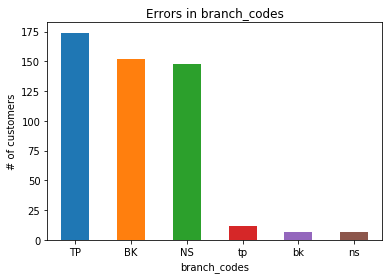

In [50]:
# the unique branch codes and their occurrences are identified
branch_counts = dirty_df.branch_code.value_counts()

ax = branch_counts.plot.bar(rot=0)
ax.set_xlabel('branch_codes')
ax.set_ylabel('# of customers')
ax.set_title('Errors in branch_codes')

From the above plot, it can be seen that there are several **syntactical errors** as well (the branch codes in
small letters instead of capital). Thus both the syntactic and semantic errors are fixed for this column. 

In [51]:
# the syntactic errors in branch_code is fixed by converting all the codes to upper case.
dirty_df['branch_code'] = dirty_df.apply(lambda row: row['branch_code'].upper(),axis=1)

In [52]:
# the semantic errors in branch_code is fixed by cross-checking its order_id. For this, the 'check_branch_code'
# function defined earlier is used.
dirty_df['branch_code'] = dirty_df.apply(lambda row:check_branch_code(row['order_id'], row['branch_code']),axis=1)
dirty_df.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDY03163,2018-09-15,16:27:02,Dinner,TP,"[('Fish&Chips', 4), ('Salmon', 7), ('Pasta', 3...",671.5,-37.815611,144.973490,0,8.318,14.140324
1,ORDB08039,2018-05-19,12:33:48,Lunch,TP,"[('Steak', 4), ('Salad', 7)]",300.4,-37.806544,145.010707,0,12.438,17.011135
2,ORDA01841,2018-08-21,15:36:20,Lunch,BK,"[('Fish&Chips', 3), ('Fries', 10), ('Chicken',...",511.0,-37.823347,144.988505,0,6.383,12.206218
3,ORDB05089,2018-03-14,10:21:58,Breakfast,TP,"[('Coffee', 3), ('Cereal', 10), ('Pancake', 10)]",475.0,-37.799659,144.970194,0,9.221,12.911713
4,ORDA10328,2018-07-16,14:25:21,Lunch,BK,"[('Fries', 9), ('Salad', 8), ('Burger', 6)]",431.6,-37.805799,144.994800,0,5.102,11.231360


#### Sixth Column: order_items 

As indicated, each meal has a distinct set of items in the menu, thus the items served for breakfast lunch and dinner
are identified from the missing dataset. This is done because we know that the data in the imputed dataset has no errors thus it would be suitable to identify the items served in each meal.

In [53]:
# a list for each meal served is created
breakfast = []
lunch = []
dinner = []

In [54]:
#   This function creates the list of order items from all the observations in the dataset
#
#   :param oitems:   the items ordered by each customer
#          otype:    the order type of the order placed

def get_items(oitems, otype):
    
    # converts string into list of tuples
    oitems = ast.literal_eval(oitems)
    
    # creates individual lists for each meal of the day
    if otype == 'Breakfast':
        breakfast.append([x[0] for x in oitems])
    elif otype == 'Lunch':
        lunch.append([x[0] for x in oitems])
    else:
        dinner.append([x[0] for x in oitems])

In [55]:
# the order items from the 500 error free observations are gathered
for index, row in missing_data_sol.iterrows():
    get_items(row['order_items'], row['order_type'])

# the unique set of order items for each meal are extracted
breakfast_items = set([j for i in breakfast for j in i])
lunch_items = set([j for i in lunch for j in i])
dinner_items = set([j for i in dinner for j in i])

print('Items served for breakfast: ', breakfast_items)
print('Items served for lunch: ', lunch_items)
print('Items served for dinner: ', dinner_items)

Items served for breakfast:  {'Coffee', 'Eggs', 'Cereal', 'Pancake'}
Items served for lunch:  {'Steak', 'Burger', 'Fries', 'Chicken', 'Salad'}
Items served for dinner:  {'Pasta', 'Fish&Chips', 'Shrimp', 'Salmon'}


In order to identify the price of each item, linear equations are generated and these are solved using the simultaneous equations method.

The prices for breakfast items are obtained. Since there are 4 breakfast items, 4 linear equations are required to 
get their individual prices.

In [56]:
cereal = []
pancake = []
eggs = []
coffee = []
breakfast_ordinate = []

i = 0

# the observations that belong to breakfast are extracted
br_records = missing_data_sol.loc[missing_data_sol['order_type'] == 'Breakfast']

# identify observations with 4 breakfast items to create equations
while (len(breakfast_ordinate) < 4):
    
    oitem = br_records.iloc[i]['order_items']
    oitem = ast.literal_eval(oitem)
    
    if len(oitem) == 4:
        oitem = dict(oitem)
        cereal.append(oitem['Cereal'])
        eggs.append(oitem['Eggs'])
        coffee.append(oitem['Coffee'])
        pancake.append(oitem['Pancake'])
        breakfast_ordinate.append(br_records.iloc[i]['order_price'])
    
    i += 1

# the coefficient matrix 4*4 is created (4 items and 4 equations)
breakfast_coeff = np.stack((coffee, pancake, eggs, cereal), axis=-1)
# the prices of the items are obtained by solving the simultaneous equations
breakfast_prices = np.linalg.solve(breakfast_coeff, np.array(breakfast_ordinate))
breakfast_dict = dict(zip(['Coffee','Pancake', 'Eggs', 'Cereal'], np.around(breakfast_prices,2)))

print('Breakfast Menu:', breakfast_dict)

Breakfast Menu: {'Coffee': 7.5, 'Pancake': 24.25, 'Eggs': 22.0, 'Cereal': 21.0}


The prices for lunch items are obtained. Since there are 5 lunch items, 5 linear equations are required to 
get their individual prices.

In [57]:
steak = []
fries = []
chicken = []
salad = []
burger = []
lunch_ordinate = []

i = 0

# the observations that belong to lunch are extracted
l_records = missing_data_sol.loc[missing_data_sol['order_type'] == 'Lunch']

# identify observations with 5 lunch items to create equations
while (len(lunch_ordinate) < 5):
    
    oitem = l_records.iloc[i]['order_items']
    oitem = ast.literal_eval(oitem)
    
    if len(oitem) == 5:
        oitem = dict(oitem)
        steak.append(oitem['Steak'])
        fries.append(oitem['Fries'])
        chicken.append(oitem['Chicken'])
        salad.append(oitem['Salad'])
        burger.append(oitem['Burger'])
        lunch_ordinate.append(l_records.iloc[i]['order_price'])
    
    i += 1
    
# the coefficient matrix 5*5 is created (5 items and 5 equations)
lunch_coeff = np.stack((fries, chicken, burger, steak, salad), axis=-1)
# the prices of the items are obtained by solving the simultaneous equations
lunch_prices = np.linalg.solve(lunch_coeff, np.array(lunch_ordinate))
lunch_dict = dict(zip(['Fries', 'Chicken', 'Burger', 'Steak', 'Salad'], np.around(lunch_prices,2)))

print('Lunch Menu:', lunch_dict)

Lunch Menu: {'Fries': 12.0, 'Chicken': 32.0, 'Burger': 31.0, 'Steak': 45.0, 'Salad': 17.2}


The prices for dinner items are obtained. Since there are 4 dinner items, 4 linear equations are required to 
get their individual prices.

In [58]:
pasta = []
shrimp = []
fish = []
salmon = []
dinner_ordinate = []

i = 0

# the observations that belong to dinner are extracted
d_records = missing_data_sol.loc[missing_data_sol['order_type'] == 'Dinner']

# identify observations with 4 lunch items to create equations
while (len(dinner_ordinate) < 4):
    
    oitem = d_records.iloc[i]['order_items']
    oitem = ast.literal_eval(oitem)
    
    if len(oitem) == 4:
        oitem = dict(oitem)
        pasta.append(oitem['Pasta'])
        shrimp.append(oitem['Shrimp'])
        fish.append(oitem['Fish&Chips'])
        salmon.append(oitem['Salmon'])
        dinner_ordinate.append(d_records.iloc[i]['order_price'])
    
    i += 1
    
# the coefficient matrix 4*4 is created (4 items and 4 equations)
dinner_coeff = np.stack((shrimp, salmon, pasta, fish), axis=-1)
# the prices of the items are obtained by solving the simultaneous equations
dinner_prices = np.linalg.solve(dinner_coeff, np.array(dinner_ordinate))
dinner_dict = dict(zip(['Shrimp', 'Salmon', 'Pasta', 'Fish&Chips'], np.around(dinner_prices,2)))

print('Dinner Menu:', dinner_dict)

Dinner Menu: {'Shrimp': 54.0, 'Salmon': 41.0, 'Pasta': 27.5, 'Fish&Chips': 35.0}


In [59]:
# converting string into list of tuples for further processing
dirty_df['order_items'] = dirty_df.apply(lambda row: ast.literal_eval(row['order_items']),axis=1)

In [60]:
#   This function verifies the list of items placed in an order are in the menu
#   for that particular meal of the day.
#
#   :param oitems:   the items ordered by each customer
#          otype:    the order type of the order placed
#          oprice:   the total price of the order placed
#
#   :return verified_items: the verified list of items and their respective quantities in an order.

def check_items(otype, oitems, oprice):
    
    items = [x[0] for x in oitems]
    quantity = [x[1] for x in oitems]

    # verify the items in the breakfast menu
    if otype == "Breakfast":

        for i in range(len(items)):
            if items[i] not in breakfast_dict.keys():
                pop_item = items.pop(i)
                pop_quant = quantity.pop(i)
                
                item_price = np.around((oprice - sum(np.array([breakfast_dict[x] for x in items]) \
                                                     * np.array(quantity)))/pop_quant,2)
                items.append([key  for (key, value) in breakfast_dict.items() if value == item_price][0])
                quantity.append(pop_quant)
    
    # verify the items in the lunch menu
    elif otype == "Lunch":
        
        for i in range(len(items)):
            if items[i] not in lunch_dict.keys():
                pop_item = items.pop(i)
                pop_quant = quantity.pop(i)
                
                item_price = np.around((oprice - sum(np.array([lunch_dict[x] for x in items]) \
                                                     * np.array(quantity)))/pop_quant,2)
                items.append([key  for (key, value) in lunch_dict.items() if value == item_price][0])
                quantity.append(pop_quant)
    
    # verify the items in the dinner menu
    else:
  
        for i in range(len(items)):
            if items[i] not in dinner_dict.keys():
                pop_item = items.pop(i)
                pop_quant = quantity.pop(i)
                
                item_price = np.around((oprice - sum(np.array([dinner_dict[x] for x in items]) \
                                                     * np.array(quantity)))/pop_quant,2)
                items.append([key  for (key, value) in dinner_dict.items() if value == item_price][0])
                quantity.append(pop_quant)
    
    verified_items = list(zip(items, quantity))
    
    return verified_items

In [61]:
# the order items for each observation is verified with its type and thus fixed if incorrect item names are listed.
dirty_df['order_items'] = dirty_df.apply(lambda row:check_items(row['order_type'], row['order_items'], row['order_price']),axis=1)

#### Seventh Column: order_price 

From the previously calculated order items and their respective prices, the **semantic errors** within this column can be identified. These errors are fixed by computing the **sum of the products** of quantity of each item with its corresponding price.

In [62]:
#   This function computes the price for each order and verifies with the price in the dataset. 
#   If the price is incorrect it is replaced with the computed price. In this way the semantic
#   errors in this column are fixed.
#
#   :param oitems:   the items ordered by each customer
#          otype:    the order type of the order placed
#          oprice:   the total price of the order placed
#
#   :return oprice:  the correct (verified) price of the order.

def check_price(otype, oitems, oprice):
    
    items = [x[0] for x in oitems]
    quantity = [x[1] for x in oitems]
    
    # compute the price for breakfast items
    if otype == "Breakfast":
        price_esti  = np.around(sum(np.array([breakfast_dict[x] for x in items]) * np.array(quantity)),2)
    # compute the price for lunch items
    elif otype == "Lunch":
        price_esti  = np.around(sum(np.array([lunch_dict[x] for x in items]) * np.array(quantity)),2)
    # compute the price for dinner items   
    else:
        price_esti  = np.around(sum(np.array([dinner_dict[x] for x in items]) * np.array(quantity)),2)
        
    # replace the incorrect price with the correct one(if any)
    if oprice != price_esti:
        return price_esti
    
    return oprice

In [63]:
# the order price of each order placed is verified and a suitable fix is applied if there is an error. 
dirty_df['order_price'] = dirty_df.apply(lambda row:check_price(row['order_type'], row['order_items'], row['order_price']),axis=1)

#### Eigth & Ninth Column: customer_lat and customer_lon

The customer's latitude and longitude are treated together. Since, the dataset is derived with respect to the restaurant located in Melbourne, Australia (below equator), thus the latitude of all the observations must be **negative** and the longitude (east of the Prime Meridian) needs to be **positive**. Also, if the latitude is positive but the longitude is negative, we can say that the values are **interchanged**. These **semantic errors** are verified within these features.

The records in which the latitute and longitude is interchanged are identified. Afterwhich, the values are swapped 
in these records in order to fix the semantic error. 

In [64]:
# extracting records where the latitude and longitude of the records are intechanged
interchanged_df = dirty_df[(dirty_df['customer_lat'] > 0) & (dirty_df['customer_lon'] < 0)]
# the index of these records are obtained
interchange_idx = (interchanged_df['customer_lat'] > 0) & (interchanged_df['customer_lon'] < 0)

interchanged_df.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
376,ORDX10477,2018-08-06,15:05:54,Lunch,BK,"[(Steak, 3), (Burger, 7), (Salad, 4), (Fries, ...",540.8,144.970391,-37.823134,0,7.938,13.555022
385,ORDJ02390,2018-11-05,18:08:27,Dinner,TP,"[(Pasta, 6), (Salmon, 10), (Fish&Chips, 9), (S...",1160.0,144.963469,-37.815258,0,7.906,12.166725
459,ORDA05768,2018-05-19,12:33:48,Lunch,BK,"[(Steak, 5), (Salad, 10), (Fries, 1), (Burger,...",817.0,144.962735,-37.803438,0,7.742,16.251153
460,ORDZ08685,2018-12-06,19:19:26,Dinner,NS,"[(Salmon, 8), (Pasta, 5)]",465.5,145.015210,-37.810352,0,10.826,16.713025


In the above, it can clearly be seen that the customer's lat and lon are interchanged. Below is a fix for these 
observations.

In [65]:
# the interchanged lat and lon of customer's are swapped.
interchanged_df.loc[interchange_idx,['customer_lat','customer_lon']] = interchanged_df.loc[interchange_idx,\
                                                                       ['customer_lon','customer_lat']].values
interchanged_df.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
376,ORDX10477,2018-08-06,15:05:54,Lunch,BK,"[(Steak, 3), (Burger, 7), (Salad, 4), (Fries, ...",540.8,-37.823134,144.970391,0,7.938,13.555022
385,ORDJ02390,2018-11-05,18:08:27,Dinner,TP,"[(Pasta, 6), (Salmon, 10), (Fish&Chips, 9), (S...",1160.0,-37.815258,144.963469,0,7.906,12.166725
459,ORDA05768,2018-05-19,12:33:48,Lunch,BK,"[(Steak, 5), (Salad, 10), (Fries, 1), (Burger,...",817.0,-37.803438,144.962735,0,7.742,16.251153
460,ORDZ08685,2018-12-06,19:19:26,Dinner,NS,"[(Salmon, 8), (Pasta, 5)]",465.5,-37.810352,145.015210,0,10.826,16.713025


To fix the errors with respect to latitude being negative and longitude as positive, the records in which the lat & lon were interchanged are removed. The remaining records are checked for semantic errors.

In [66]:
# removing the records in which the interchanged lat and lon were fixed.
dirty_df_new = dirty_df[~dirty_df['order_id'].isin(interchanged_df['order_id'])]

In [67]:
#   This function checks if the latitude of the given customer is positive. If so, the latitude is made negative
#   as the customer is located in Melbourne, Australia (southern hemishpere)
#
#   :param lat:   the latitude of the customer
#
#   :return lat:  the corrected/verified latitude for the customer.

def check_lat(lat):
    
    if lat > 0:
        lat = -lat
    
    return lat

In [68]:
# the latitude of the customer is checked, if it is positive it is fixed to a negative value
dirty_df_new.loc[:,'customer_lat'] = dirty_df_new.apply(lambda row:check_lat(row['customer_lat']),axis=1)

In [69]:
#   This function checks if the longitute of the given customer is negative. If so, the longitude is made positive
#   as the customer is located in Melbourne, Australia (east of the Prime Meridian)
#
#   :param lon:   the longitude of the customer
#
#   :return lon:  the corrected/verified longitude for the customer.

def check_lon(lon):
    
    if lon < 0:
        lon = abs(lon)
    
    return lon

In [70]:
# the longitude of the customer is checked, if it is negative it is fixed to a positive value
dirty_df_new.loc[:,'customer_lon'] = dirty_df_new.apply(lambda row:check_lon(row['customer_lon']),axis=1)

In [71]:
# combining the data fixed with swapped lat, lon 
dirty_df = pd.concat([interchanged_df , dirty_df_new])
dirty_df.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
376,ORDX10477,2018-08-06,15:05:54,Lunch,BK,"[(Steak, 3), (Burger, 7), (Salad, 4), (Fries, ...",540.8,-37.823134,144.970391,0,7.938,13.555022
385,ORDJ02390,2018-11-05,18:08:27,Dinner,TP,"[(Pasta, 6), (Salmon, 10), (Fish&Chips, 9), (S...",1160.0,-37.815258,144.963469,0,7.906,12.166725
459,ORDA05768,2018-05-19,12:33:48,Lunch,BK,"[(Steak, 5), (Salad, 10), (Fries, 1), (Burger,...",817.0,-37.803438,144.962735,0,7.742,16.251153
460,ORDZ08685,2018-12-06,19:19:26,Dinner,NS,"[(Salmon, 8), (Pasta, 5)]",465.5,-37.810352,145.015210,0,10.826,16.713025
0,ORDY03163,2018-09-15,16:27:02,Dinner,TP,"[(Fish&Chips, 4), (Salmon, 7), (Pasta, 3), (Sh...",671.5,-37.815611,144.973490,0,8.318,14.140324


As customer loyalty and the delivery are dependent on the distance of the customer from its respective branch, a fix if first provided to the distance column.

#### Eleventh Column: distance_to_customer_KM

Here, similar the distance of the customers is verified by computing the shortest distance between its branch (similar to the imputation of distance values). For this, the data in the branches dataset is merged. 

In [72]:
# merging data with the branches dataset to retrieve latitude and longitude of branches used for computing distances
dirty_df = pd.merge(dirty_df, branches, on='branch_code')

In [73]:
# the shortest distance of all the customers with respect to their branches are computed
dirty_df['shortest_dist'] = dirty_df.apply(lambda row:calculate_distance(row['branch_lat'], row['branch_lon'],\
                                                                row['customer_lat'], row['customer_lon']),axis=1)
dirty_df.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,branch_lat,branch_lon,shortest_dist
0,ORDX10477,2018-08-06,15:05:54,Lunch,BK,"[(Steak, 3), (Burger, 7), (Salad, 4), (Fries, ...",540.80,-37.823134,144.970391,0,7.938,13.555022,-37.815834,145.04645,7.938
1,ORDA05768,2018-05-19,12:33:48,Lunch,BK,"[(Steak, 5), (Salad, 10), (Fries, 1), (Burger,...",817.00,-37.803438,144.962735,0,7.742,16.251153,-37.815834,145.04645,7.742
2,ORDA01841,2018-08-21,15:36:20,Lunch,BK,"[(Fries, 10), (Chicken, 8), (Steak, 3)]",511.00,-37.823347,144.988505,0,6.383,12.206218,-37.815834,145.04645,6.383
3,ORDA10328,2018-07-16,14:25:21,Lunch,BK,"[(Fries, 9), (Salad, 8), (Burger, 6)]",431.60,-37.805799,144.994800,0,5.102,11.231360,-37.815834,145.04645,5.102
4,ORDA04006,2018-07-04,14:05:04,Lunch,BK,"[(Steak, 7), (Fries, 4), (Chicken, 5)]",523.00,-37.823397,144.935580,0,10.609,16.674012,-37.815834,145.04645,10.609
5,ORDA06294,2018-09-13,16:27:02,Dinner,BK,"[(Pasta, 1), (Shrimp, 9), (Salmon, 9)]",882.50,-37.809284,144.957531,0,8.000,15.366063,-37.815834,145.04645,8.000
6,ORDX05369,2018-11-23,18:49:00,Dinner,BK,"[(Shrimp, 3), (Fish&Chips, 2), (Salmon, 8), (P...",587.50,-37.819768,144.942664,0,6.744,16.512848,-37.815834,145.04645,9.780
7,ORDJ10983,2018-07-30,14:55:46,Lunch,BK,"[(Salad, 2), (Steak, 9), (Chicken, 6), (Fries,...",655.40,-37.812112,144.973982,0,8.787,12.352091,-37.815834,145.04645,6.760
8,ORDK04791,2018-02-17,09:31:16,Breakfast,BK,"[(Eggs, 4), (Pancake, 7), (Cereal, 10)]",467.75,-37.825292,144.982156,0,7.002,14.001217,-37.815834,145.04645,7.002
9,ORDK05494,2018-11-05,18:08:27,Dinner,BK,"[(Shrimp, 5), (Fish&Chips, 1)]",305.00,-37.819857,144.951875,0,8.922,16.059124,-37.815834,145.04645,8.922


In the above data, it can be seen that there are several incorrect values in **distance_to_customer_KM**. To further be able to compare the computed shortest distance with the distances in the dataset, both these values are rounded 
to its 3rd decimal place.

In [74]:
# rounding off the shortest_dist and distance_to_customer_KM to the 3rd decimal place.
dirty_df['distance_to_customer_KM'] = dirty_df['distance_to_customer_KM'].\
                                                  apply(lambda x: round(x, 3))
dirty_df['shortest_dist'] = dirty_df['shortest_dist'].apply(lambda x: round(x, 3))

Now that both values can be easily compared, the mis-calculated distances are replaced with its correctly computed
shortest distance using the Dijkstra's algorithm.

In [75]:
#   This function verifies if the distance_to_customer_KM is same as the shortest_distance computed using Dijkstra's
#   algorithm. If not then, it is replaced with the calculated shortest distance.
#
#   :param shortest_dist:   the computed shortest distance of the customer
#          dist:            the stored distance in the dataset
#
#   :return dist:  the corrected/verified distance of the customer with its respective branch.

def check_shortest_distance(shortest_dist, dist):
    
    if dist != shortest_dist:
        dist = shortest_dist
        
    return dist

In [76]:
# checking the mis-calculated distances in the data and fixing those with the computed shortest distance
dirty_df['distance_to_customer_KM'] = dirty_df.apply(lambda row:check_shortest_distance\
                                        (row['shortest_dist'], row['distance_to_customer_KM']),axis=1)

Below, it can be seen that the mis-calculated distances are correctly replaced with the shortest distance of the customer with its branch.

In [77]:
dirty_df.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,branch_lat,branch_lon,shortest_dist
0,ORDX10477,2018-08-06,15:05:54,Lunch,BK,"[(Steak, 3), (Burger, 7), (Salad, 4), (Fries, ...",540.80,-37.823134,144.970391,0,7.938,13.555022,-37.815834,145.04645,7.938
1,ORDA05768,2018-05-19,12:33:48,Lunch,BK,"[(Steak, 5), (Salad, 10), (Fries, 1), (Burger,...",817.00,-37.803438,144.962735,0,7.742,16.251153,-37.815834,145.04645,7.742
2,ORDA01841,2018-08-21,15:36:20,Lunch,BK,"[(Fries, 10), (Chicken, 8), (Steak, 3)]",511.00,-37.823347,144.988505,0,6.383,12.206218,-37.815834,145.04645,6.383
3,ORDA10328,2018-07-16,14:25:21,Lunch,BK,"[(Fries, 9), (Salad, 8), (Burger, 6)]",431.60,-37.805799,144.994800,0,5.102,11.231360,-37.815834,145.04645,5.102
4,ORDA04006,2018-07-04,14:05:04,Lunch,BK,"[(Steak, 7), (Fries, 4), (Chicken, 5)]",523.00,-37.823397,144.935580,0,10.609,16.674012,-37.815834,145.04645,10.609
5,ORDA06294,2018-09-13,16:27:02,Dinner,BK,"[(Pasta, 1), (Shrimp, 9), (Salmon, 9)]",882.50,-37.809284,144.957531,0,8.000,15.366063,-37.815834,145.04645,8.000
6,ORDX05369,2018-11-23,18:49:00,Dinner,BK,"[(Shrimp, 3), (Fish&Chips, 2), (Salmon, 8), (P...",587.50,-37.819768,144.942664,0,9.780,16.512848,-37.815834,145.04645,9.780
7,ORDJ10983,2018-07-30,14:55:46,Lunch,BK,"[(Salad, 2), (Steak, 9), (Chicken, 6), (Fries,...",655.40,-37.812112,144.973982,0,6.760,12.352091,-37.815834,145.04645,6.760
8,ORDK04791,2018-02-17,09:31:16,Breakfast,BK,"[(Eggs, 4), (Pancake, 7), (Cereal, 10)]",467.75,-37.825292,144.982156,0,7.002,14.001217,-37.815834,145.04645,7.002
9,ORDK05494,2018-11-05,18:08:27,Dinner,BK,"[(Shrimp, 5), (Fish&Chips, 1)]",305.00,-37.819857,144.951875,0,8.922,16.059124,-37.815834,145.04645,8.922


Now that we do not need the latitude and longitude of the branches and also the redundant shortest distance, they are
dropped from the dataset.

In [78]:
dirty_df.drop(columns=['branch_lat', 'branch_lon', 'shortest_dist'], axis=1, inplace=True)
dirty_df.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDX10477,2018-08-06,15:05:54,Lunch,BK,"[(Steak, 3), (Burger, 7), (Salad, 4), (Fries, ...",540.8,-37.823134,144.970391,0,7.938,13.555022
1,ORDA05768,2018-05-19,12:33:48,Lunch,BK,"[(Steak, 5), (Salad, 10), (Fries, 1), (Burger,...",817.0,-37.803438,144.962735,0,7.742,16.251153
2,ORDA01841,2018-08-21,15:36:20,Lunch,BK,"[(Fries, 10), (Chicken, 8), (Steak, 3)]",511.0,-37.823347,144.988505,0,6.383,12.206218
3,ORDA10328,2018-07-16,14:25:21,Lunch,BK,"[(Fries, 9), (Salad, 8), (Burger, 6)]",431.6,-37.805799,144.994800,0,5.102,11.231360
4,ORDA04006,2018-07-04,14:05:04,Lunch,BK,"[(Steak, 7), (Fries, 4), (Chicken, 5)]",523.0,-37.823397,144.935580,0,10.609,16.674012


#### Tenth Column: customerHasloyalty?

Lastly, the customer has loyalty column is verified based on its respective delivery fee value. As discussed before, we know that if the customer holds the loyalty, they get a 50% reduction in the delivery fee. This information is used to fix errors in the customer has loyalty column by assuming that the delivery fee values are all correct.

The delivery fee of the customers are computed using the regression models generated earlier. For this, additional **weekend**, **time_of_day** and **normalised_fee** columns are added.

In [79]:
dirty_df = dirty_df.join(pd.DataFrame(
    {
        'weekend': np.nan,
        'time_of_day': np.nan,
        'normalised_fee': np.nan
    }, index = dirty_df.index
))

In [80]:
# the 'weekend' column is filled with boolean depending on the date of the order
dirty_df['weekend'] = dirty_df.apply(lambda row:is_weekend(row['date']),axis=1)

In [81]:
# converting 'order_type' to categorical variable
dirty_df['order_type'] = dirty_df['order_type'].astype('category')

# corresponding code of 'order_type' is added to the 'time_of_day' column
dirty_df['time_of_day'] = pd.Categorical(dirty_df['order_type'], categories=["Breakfast", "Lunch", "Dinner"],
                                          ordered=True).codes

In [82]:
# the delivery fee for all the customers based on the regression models is computed
dirty_df.loc[:,'normalised_fee'] = dirty_df.apply(lambda row:calculate_fee(row['branch_code'],
                                        row['weekend'], row['time_of_day'], row['distance_to_customer_KM']),axis=1)

In [83]:
dirty_df.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day,normalised_fee
0,ORDX10477,2018-08-06,15:05:54,Lunch,BK,"[(Steak, 3), (Burger, 7), (Salad, 4), (Fries, ...",540.80,-37.823134,144.970391,0,7.938,13.555022,0,1,13.814922
1,ORDA05768,2018-05-19,12:33:48,Lunch,BK,"[(Steak, 5), (Salad, 10), (Fries, 1), (Burger,...",817.00,-37.803438,144.962735,0,7.742,16.251153,1,1,16.140883
2,ORDA01841,2018-08-21,15:36:20,Lunch,BK,"[(Fries, 10), (Chicken, 8), (Steak, 3)]",511.00,-37.823347,144.988505,0,6.383,12.206218,0,1,12.125481
3,ORDA10328,2018-07-16,14:25:21,Lunch,BK,"[(Fries, 9), (Salad, 8), (Burger, 6)]",431.60,-37.805799,144.994800,0,5.102,11.231360,0,1,10.733730
4,ORDA04006,2018-07-04,14:05:04,Lunch,BK,"[(Steak, 7), (Fries, 4), (Chicken, 5)]",523.00,-37.823397,144.935580,0,10.609,16.674012,0,1,16.716848
5,ORDA06294,2018-09-13,16:27:02,Dinner,BK,"[(Pasta, 1), (Shrimp, 9), (Salmon, 9)]",882.50,-37.809284,144.957531,0,8.000,15.366063,0,2,14.883558
6,ORDX05369,2018-11-23,18:49:00,Dinner,BK,"[(Shrimp, 3), (Fish&Chips, 2), (Salmon, 8), (P...",587.50,-37.819768,144.942664,0,9.780,16.512848,0,2,16.817452
7,ORDJ10983,2018-07-30,14:55:46,Lunch,BK,"[(Salad, 2), (Steak, 9), (Chicken, 6), (Fries,...",655.40,-37.812112,144.973982,0,6.760,12.352091,0,1,12.535076
8,ORDK04791,2018-02-17,09:31:16,Breakfast,BK,"[(Eggs, 4), (Pancake, 7), (Cereal, 10)]",467.75,-37.825292,144.982156,0,7.002,14.001217,1,0,14.335629
9,ORDK05494,2018-11-05,18:08:27,Dinner,BK,"[(Shrimp, 5), (Fish&Chips, 1)]",305.00,-37.819857,144.951875,0,8.922,16.059124,0,2,15.885272


In [84]:
#   This function verifies if the customer has a loyalty based on the computed delivery fees from the
#   regression models
#
#   :param loyalty:        the current loyalty of the customer in the dataset
#          fee:            the delivery fee for a particular order
#          normalised_fee: the computed delivery feee from the linear regression models
#
#   :return loyalty:  the revised loyalty of the customer

def verify_loyalty(loyalty, fee, normalised_fee):
    
    if fee <= (0.5 * normalised_fee):
        loyalty = 1
        
    return loyalty

In [85]:
dirty_df.loc[:,'customerHasloyalty?'] = dirty_df.apply(lambda row:verify_loyalty(row['customerHasloyalty?'],\
                                        row['delivery_fee'], row['normalised_fee']),axis=1)

Now that all the features are cleaned, the additonal columns are dropped and the cleansed data is stored in a CSV file.

In [86]:
dirty_df.drop(columns=['weekend', 'time_of_day', 'normalised_fee'], axis=1, inplace=True)
dirty_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null datetime64[ns]
time                       500 non-null object
order_type                 500 non-null category
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               500 non-null float64
dtypes: category(1), datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 67.5+ KB


In [87]:
# storing the cleaned data as a CSV file
dirty_df.to_csv('./Group113_dirty_data_solution.csv', index=False, header=True)

## Task 2: Outlier Detection

In this task, the outliers with respect to **delivery_fee** are detected. These **univariate** outliers are identified by computing the residuals. Afterwhich, the inter-quartile method is used to recognise onservations with high outlier scores and are discarded from the dataset.

The given outlier data is explored below

In [88]:
outlier_df.shape

(500, 12)

In [89]:
outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                500 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    500 non-null float64
delivery_fee               500 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


A box plot is used to explore the data in the features.

Text(0, 0.5, 'Values')

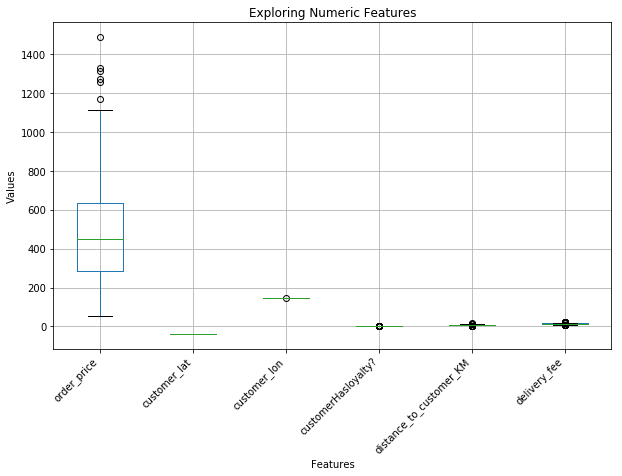

In [90]:
bp = outlier_df.boxplot(figsize=(10,6))
bp.set_xticklabels(bp.get_xticklabels(), rotation = 45, ha="right")
bp.set_title("Exploring Numeric Features")
bp.set_xlabel("Features")
bp.set_ylabel("Values")

Further exploring the order price based on the order type:

Text(0, 0.5, 'order price')

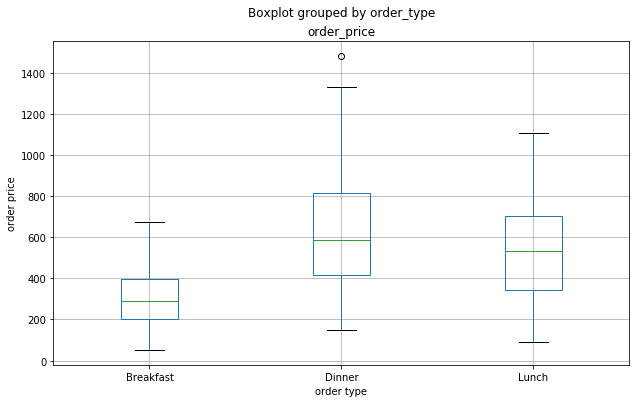

In [91]:
op_plot = outlier_df.boxplot('order_price', by='order_type', figsize=(10,6))
op_plot.set_xlabel('order type')
op_plot.set_ylabel('order price')

Now, the delivery fee is explored based on its branch codes as they are computed for each branch differently.

Text(0, 0.5, 'Delivery Fee')

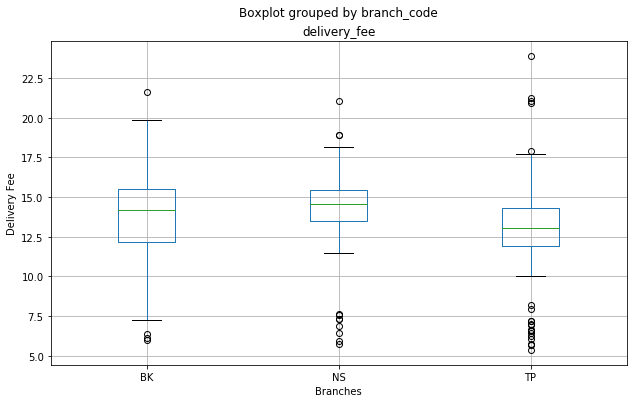

In [92]:
fee_plot = outlier_df.boxplot('delivery_fee', by='branch_code', figsize=(10,6))
fee_plot.set_xlabel('Branches')
fee_plot.set_ylabel('Delivery Fee')

In [93]:
# the date and time are conerted to 'datetime' from strings
outlier_df['date'] = pd.to_datetime(outlier_df['date'])
outlier_df['time'] = pd.to_datetime(outlier_df['time'])

In order to obtain the residuals for detecting outliers, predictions are made using the regression models generated earlier. These same models are used as it is assumed that all the 3 (dirt, missing and outlier) datasets are obtained from the same source. Thus the intial models can be applied to current dataset for making predictions of the delivery fees.

To do this, as before additional columns on which the delivery fee is dependent are include. Also, in this case a residual column to store the computed residuals from the model is created

In [94]:
outlier_df = outlier_df.join(pd.DataFrame(
    {
        'weekend': np.nan,
        'time_of_day': np.nan,
        'actual_fee': np.nan,
        'predicted_fee': np.nan,
        'residuals': np.nan
    }, index = outlier_df.index
))

In [95]:
# the 'weekend' column is filled with boolean depending on the date of the order
outlier_df['weekend'] = outlier_df.apply(lambda row:is_weekend(row['date']),axis=1)

In [96]:
# converting 'order_type' to categorical variable
outlier_df['order_type'] = outlier_df['order_type'].astype('category')

# corresponding code of 'order_type' is added to the 'time_of_day' column
outlier_df['time_of_day'] = pd.Categorical(outlier_df['order_type'], categories=["Breakfast", "Lunch", "Dinner"],
                                          ordered=True).codes

In [97]:
# computing the un-discounted delivery fee for all the customers
outlier_df.loc[:,'actual_fee'] = outlier_df.apply(lambda row:normalise_delivery_fee(row['customerHasloyalty?'], 
                                                                      row['delivery_fee']),axis=1) 

# predicting the delivery fee from the regression models
# the delivery fee for all the customers based on the regression models is computed
outlier_df.loc[:,'predicted_fee'] = outlier_df.apply(lambda row:calculate_fee(row['branch_code'],
                                        row['weekend'], row['time_of_day'], row['distance_to_customer_KM']),axis=1)

In [98]:
outlier_df['residuals'] = outlier_df.apply(lambda row: row['actual_fee'] - row['predicted_fee'],axis=1)

In [99]:
outlier_df.head(15)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day,actual_fee,predicted_fee,residuals
0,ORDA10115,2018-03-19,2019-10-07 10:32:06,Breakfast,BK,"[('Coffee', 8), ('Eggs', 2)]",104.00,-37.807628,144.958171,0,7.886,12.219357,0,0,12.219357,12.757150,-0.537793
1,ORDZ00416,2018-11-23,2019-10-07 18:49:00,Dinner,NS,"[('Salmon', 3), ('Fish&Chips', 8)]",403.00,-37.818522,144.983040,0,8.862,14.817088,0,2,14.817088,14.813444,0.003644
2,ORDY09520,2018-10-22,2019-10-07 17:48:10,Dinner,TP,"[('Pasta', 8), ('Salmon', 1), ('Fish&Chips', 3...",690.00,-37.809585,144.946730,0,9.675,14.076967,0,2,14.076967,13.700938,0.376029
3,ORDK01884,2018-07-23,2019-10-07 14:45:38,Lunch,BK,"[('Steak', 2), ('Salad', 2), ('Chicken', 8), (...",404.40,-37.811825,144.990334,0,5.173,10.891835,0,1,10.891835,10.810868,0.080967
4,ORDX03954,2018-12-28,2019-10-07 20:00:00,Dinner,BK,"[('Shrimp', 1), ('Fish&Chips', 4), ('Pasta', 1...",303.50,-37.797493,145.008720,0,5.321,11.923254,0,2,11.923254,11.972940,-0.049686
5,ORDB06239,2018-01-05,2019-10-07 08:00:00,Breakfast,TP,"[('Eggs', 3), ('Coffee', 5), ('Pancake', 6)]",249.00,-37.811591,144.972485,1,8.833,6.052829,0,0,12.105657,11.523104,0.582553
6,ORDY03276,2018-12-02,2019-10-07 19:09:17,Dinner,TP,"[('Pasta', 4), ('Salmon', 4)]",274.00,-37.821219,144.988048,0,9.420,14.757526,1,2,14.757526,14.964114,-0.206588
7,ORDX08008,2018-03-01,2019-10-07 09:51:32,Breakfast,BK,"[('Cereal', 6), ('Coffee', 8), ('Eggs', 6)]",318.00,-37.819041,144.989620,0,5.845,10.539557,0,0,10.539557,10.539691,-0.000134
8,ORDX10860,2018-07-15,2019-10-07 14:25:21,Lunch,BK,"[('Burger', 10), ('Steak', 7), ('Salad', 8), (...",914.60,-37.799764,144.935714,0,12.723,21.614788,1,1,21.614788,21.552525,0.062263
9,ORDI05261,2018-05-08,2019-10-07 12:13:31,Lunch,NS,"[('Fries', 7), ('Steak', 3), ('Chicken', 8)]",475.00,-37.804187,144.971475,0,7.006,12.236238,0,1,12.236238,12.462204,-0.225965


In [100]:
outlier_tp_branch = outlier_df[outlier_df['branch_code'] == 'TP']
outlier_bk_branch = outlier_df[outlier_df['branch_code'] == 'BK']
outlier_ns_branch = outlier_df[outlier_df['branch_code'] == 'NS']

Text(0.5, 1.0, 'Branch NS')

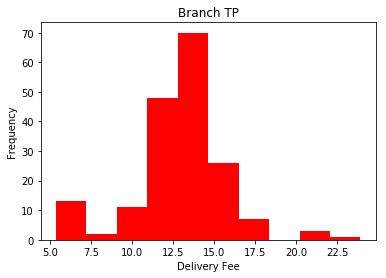

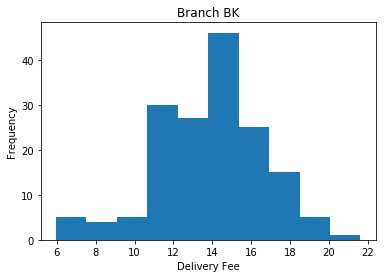

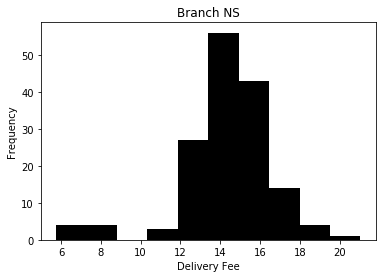

In [101]:
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
n, bins, patches = ax1.hist(outlier_tp_branch['delivery_fee'], color='r')
ax1.set_xlabel('Delivery Fee')
ax1.set_ylabel('Frequency')
ax1.set_title('Branch TP')


fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
n, bins, patches = ax2.hist(outlier_bk_branch['delivery_fee'])
ax2.set_xlabel('Delivery Fee')
ax2.set_ylabel('Frequency')
ax2.set_title('Branch BK')

fig3 = plt.figure()
ax3 = fig3.add_subplot(1, 1, 1)
n, bins, patches = ax3.hist(outlier_ns_branch['delivery_fee'], color='black')
ax3.set_xlabel('Delivery Fee')
ax3.set_ylabel('Frequency')
ax3.set_title('Branch NS')

The outliers in the delivery fee with respect to each branch are also evident in the above plotted distributions.

#### Generating Residual Box Plots for the 3 branches of the restaurant

#### Branch: TP

Text(0, 0.5, 'Values')

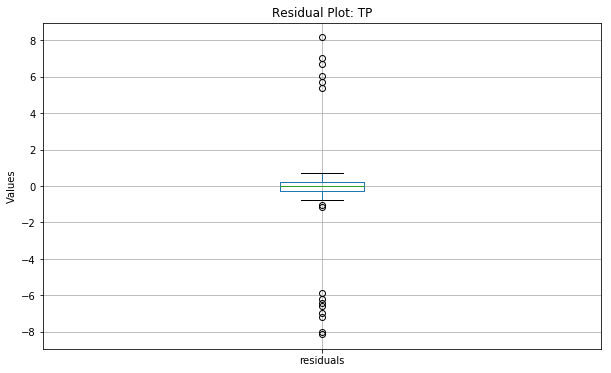

In [102]:
ax_tp = outlier_tp_branch.boxplot('residuals', figsize=(10,6))
ax_tp.set_title("Residual Plot: TP")
ax_tp.set_ylabel('Values')

#### Branch: BK

Text(0, 0.5, 'Values')

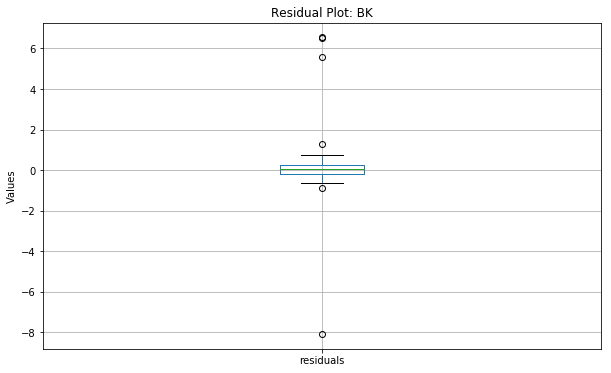

In [103]:
ax_bk = outlier_bk_branch.boxplot('residuals', figsize=(10,6))
ax_bk.set_title("Residual Plot: BK")
ax_bk.set_ylabel('Values')

#### Branch: NS

Text(0, 0.5, 'Values')

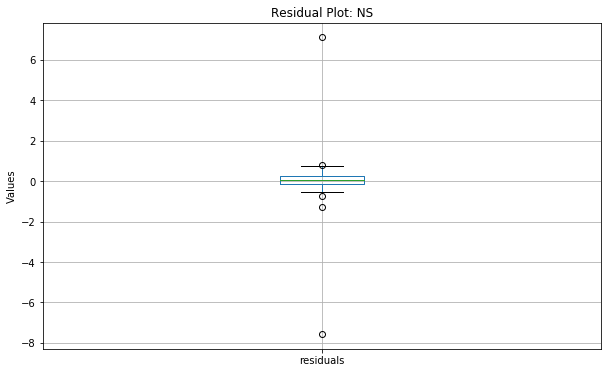

In [104]:
ax_ns = outlier_ns_branch.boxplot('residuals', figsize=(10,6))
ax_ns.set_title("Residual Plot: NS")
ax_ns.set_ylabel('Values')

The outliers are those that lie below the lower whiser and above the upper whiskers.

In [105]:
#   This computes the interquantile range and the upper and lower whiskers
#
#   :param Q1:  25th quantile value for a given branch
#          Q3:  75th quantile value for a given branch
#
#   :return IQR:   computed interquantile range for the branch
#       lower_w:   computed lower whisker range for the branch
#       upper_w:   computed upper whisker range for the branch

def compute_whiskers(Q1, Q3):
    
    IQR = Q3 - Q1
    lower_w = Q1 - 1.5 * IQR
    upper_w = Q3 + 1.5 * IQR
    
    return IQR, lower_w, upper_w

In [106]:
# the interquantile range and the upper and lower whiskers for TP branch are computed
Q1_bk = outlier_bk_branch['residuals'].quantile(0.25)
Q3_bk = outlier_bk_branch['residuals'].quantile(0.75)
IQR_bk, lower_bk, upper_bk = compute_whiskers(Q1_bk, Q3_bk)

# the data points lying outside the quantiles are dropped from the dataset
outlier_bk_branch.drop(outlier_bk_branch[(outlier_bk_branch.residuals < lower_bk) |\
                                                      (outlier_bk_branch.residuals > upper_bk)].index, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [107]:
# the interquantile range and the upper and lower whiskers for TP branch are computed
Q1_tp = outlier_tp_branch['residuals'].quantile(0.25)
Q3_tp = outlier_tp_branch['residuals'].quantile(0.75)
IQR_tp, lower_tp, upper_tp = compute_whiskers(Q1_tp, Q3_tp)

# the data points lying outside the quantiles are dropped from the dataset
outlier_tp_branch.drop(outlier_tp_branch[(outlier_tp_branch.residuals < lower_tp) |\
                                                      (outlier_tp_branch.residuals > upper_tp)].index, inplace=True)

In [108]:
# the interquantile range and the upper and lower whiskers for NS branch are computed
Q1_ns = outlier_ns_branch['residuals'].quantile(0.25)
Q3_ns = outlier_ns_branch['residuals'].quantile(0.75)
IQR_ns, lower_ns, upper_ns = compute_whiskers(Q1_ns, Q3_ns)

# the data points lying outside the quantiles are dropped from the dataset
outlier_ns_branch.drop(outlier_ns_branch[(outlier_ns_branch.residuals < lower_ns) |\
                                                      (outlier_ns_branch.residuals > upper_ns)].index, inplace=True)

In [109]:
# the data after removal of outliers from the 3 different branches are merged to single dataframe
outlier_sol = pd.concat([outlier_bk_branch , outlier_tp_branch, outlier_ns_branch])

In [111]:
# drop the columns generated as a part of prediction
outlier_sol.drop(['weekend', 'time_of_day', 'actual_fee', 'predicted_fee', 'residuals'], axis=1, inplace=True)

The clean data without ouliers are saved to a CSV file.

In [112]:
# storing the cleaned data as a CSV file
outlier_sol.to_csv('./Group113_outlier_data_solution.csv', index=False, header=True)

## Summary

1. Linear regression and associated features were used for imputing missing values.
2. Semantic, syntactic and coverage errors were identified and appropriate fixes were provided.
3. Shortest distance between the two location nodes was calculated using Dijkstra's algorithm.
4. Outliers were identifed using residuals and quartile-based method was used to eliminate them.

## References

1. Ways to Detect and Remove the Outliers. (2019). Retrieved 7 October 2019, from https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
2. scikit-learn: machine learning in Python — scikit-learn 0.16.1 documentation. (2019). Retrieved 7 October 2019, from https://scikit-learn.org
3. numpy.linalg.solve — NumPy v1.17 Manual. (2019). Retrieved 7 October 2019, from https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve
4. single_source_dijkstra — NetworkX 1.9 documentation. (2019). Retrieved 7 October 2019, from https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.shortest_paths.weighted.single_source_dijkstra.html